In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## `1. CARGA DE DATOS`

Text(0, 0.5, '$Ytrain$')

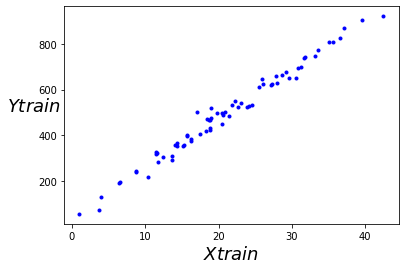

In [134]:
# Cargar los datos
x_train = pd.read_csv('dataIceCreamData/70train_30test/train_x_IceCreamData.csv')
y_train = pd.read_csv('dataIceCreamData/70train_30test/train_y_IceCreamData.csv')
x_test = pd.read_csv('dataIceCreamData/70train_30test/test_x_IceCreamData.csv')
y_test = pd.read_csv('dataIceCreamData/70train_30test/test_y_IceCreamData.csv')
x_train.shape #68
x_test.shape  #29


grafica=plt.plot(x_train,y_train,'b.')
plt.xlabel("$Xtrain$", fontsize=18)
plt.ylabel("$Ytrain$", rotation=0, fontsize=18)

In [ ]:
# iloc - filtrar por indices [fila, columna] 
x_train = x_train.iloc[:,:]
x_train = y_train.iloc[:,0]
x_test = x_test.iloc[:,:]
y_test = y_test.iloc[:,0]
y_train


## `2. Normalización`

In [135]:
# Normalización
x_media = np.concatenate((x_train, x_test), axis=0).mean(axis=0) #promedio
x_std = np.concatenate((x_train, x_test), axis=0).std(axis=0)    #desviacion estandar
y_media = np.concatenate((y_train, y_test), axis=0).mean(axis=0) #promedio
y_std = np.concatenate((y_train, y_test), axis=0).std(axis=0)    #desviacion estandar

x_std

array([8.81710814])

In [136]:
x_train = (x_train - x_media)/x_std
y_train = (y_train - y_media)/y_std
x_test = (x_test - x_media)/x_std
y_test = (y_test - y_media)/y_std

x_train

,Temperature
0,0.394768
1,0.557895
2,0.760383
3,-0.055669
4,-1.086827
...,...
65,-1.649482
66,-0.143883
67,-1.065160
68,0.045594


## `3. Agregar Unos`

In [137]:
# Agregar unos
n_exa_train = len(y_train)
n_exa_test = len(y_test)

x_train = np.concatenate((np.ones([n_exa_train, 1]),x_train), axis=1)
x_test = np.concatenate((np.ones([n_exa_test, 1]), x_test), axis=1)

print(x_train.shape)
#print(x_train)
x_train

(70, 2)


array([[ 1.        ,  0.39476806],
       [ 1.        ,  0.55789487],
       [ 1.        ,  0.76038334],
       [ 1.        , -0.05566867],
       [ 1.        , -1.08682733],
       [ 1.        , -0.76370367],
       [ 1.        , -0.83682674],
       [ 1.        ,  1.1055567 ],
       [ 1.        , -2.28071398],
       [ 1.        ,  1.20031337],
       [ 1.        , -1.092299  ],
       [ 1.        , -1.97587484],
       [ 1.        , -0.25794713],
       [ 1.        , -0.84627099],
       [ 1.        ,  2.09294668],
       [ 1.        , -0.295225  ],
       [ 1.        ,  0.54997663],
       [ 1.        ,  2.43040102],
       [ 1.        ,  0.96441017],
       [ 1.        ,  0.07823157],
       [ 1.        ,  0.49581615],
       [ 1.        , -0.66593289],
       [ 1.        ,  0.17388286],
       [ 1.        , -0.54750956],
       [ 1.        ,  0.31706008],
       [ 1.        , -0.23906608],
       [ 1.        , -0.61524792],
       [ 1.        ,  0.91854072],
       [ 1.        ,

## `4. Calcular la Predicción`

In [138]:
# calcular la predicción
def prediccion(theta, datos):
  return np.dot(datos, theta)

## 5. Calcular Costos


In [139]:
def cal_cost(theta, x, y):
  y_pred_test = prediccion(theta, x)
  to_sum = (y_pred_test - y) ** 2
  return np.sum(to_sum)/(x.shape[0]*2)

## 6. Calcular la Gradiente Descendiente

In [141]:
n_features = x_train.shape[1]
#theta = np.random.randn (2,1)
theta = np.zeros((2,1))
alpha = 0.01 # learning rate
iterations = 2000
#print(theta)

def gradient_descent(X,y,theta):
    cost_history = np.zeros(iterations)
    for it in range(iterations):
        prediction = prediccion(theta, X)
        # m = prediction.shape[0]
        theta = theta - (1/prediction.shape[0])*alpha*( X.T.dot((prediction - y)))
        cost_history[it]  = cal_cost(theta,X,y)
    return theta, cost_history


theta_r, cost_history_r = gradient_descent(x_train, y_train, theta)
print(theta_r)
cost = cal_cost(theta,x_test, y_test)
print(cost)

[[0.00280831]
 [0.99160668]]
Revenue    0.427804
dtype: float64


## `7. Plot del ECM en función de las iteraciones`

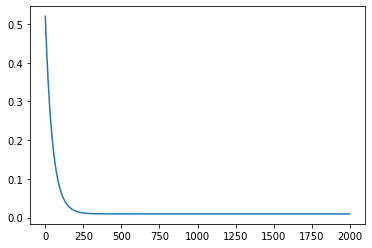

In [142]:
plt.plot(cost_history_r)
plt.show()